In [1]:
import yfinance as yf
import pandas as pd

In [2]:
df_ibov = pd.read_csv("/home/yair/GHub/Codigos-em-financas/data/ibovdia_09-08-22.csv")
df_ibov["Part. (%)"] = df_ibov["Part. (%)"].apply(lambda x: float(x.replace(",", ".")))
df_ibov = df_ibov.sort_values(by='Part. (%)',ascending =False)
# df_ibov

In [3]:
## 10 maiores sem repetição (ON/PN/...) de empresa 
acoes = df_ibov.drop_duplicates(subset='Ação', keep='first').head(10)
acoes

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
85,VALE3,VALE,ON NM,3.768.748.489,12.817
65,PETR4,PETROBRAS,PN N2,4.566.442.248,8.294
50,ITUB4,ITAUUNIBANCO,PN EJ N1,4.781.077.143,5.984
11,BBDC4,BRADESCO,PN EJ N1,5.160.570.290,4.750
6,B3SA3,B3,ON NM,5.987.625.321,3.697
2,ABEV3,AMBEV S/A,ON,4.380.195.841,3.214
13,BBAS3,BRASIL,ON NM,1.420.530.937,2.746
30,ELET3,ELETROBRAS,ON N1,985.704.248,2.361
54,RENT3,LOCALIZA,ON NM,735.708.470,2.313
88,WEGE3,WEG,ON NM,1.484.859.030,2.189


In [4]:
acoes = acoes["Código"].values
acoes = " ".join([i + '.SA' for i in acoes])
print(acoes)

tickers = yf.Tickers(acoes)
tickers.tickers

VALE3.SA PETR4.SA ITUB4.SA BBDC4.SA B3SA3.SA ABEV3.SA BBAS3.SA ELET3.SA RENT3.SA WEGE3.SA


{'VALE3.SA': yfinance.Ticker object <VALE3.SA>,
 'PETR4.SA': yfinance.Ticker object <PETR4.SA>,
 'ITUB4.SA': yfinance.Ticker object <ITUB4.SA>,
 'BBDC4.SA': yfinance.Ticker object <BBDC4.SA>,
 'B3SA3.SA': yfinance.Ticker object <B3SA3.SA>,
 'ABEV3.SA': yfinance.Ticker object <ABEV3.SA>,
 'BBAS3.SA': yfinance.Ticker object <BBAS3.SA>,
 'ELET3.SA': yfinance.Ticker object <ELET3.SA>,
 'RENT3.SA': yfinance.Ticker object <RENT3.SA>,
 'WEGE3.SA': yfinance.Ticker object <WEGE3.SA>}

In [5]:
## preço fechamento de cada papel
dict_data = {}

for ticker in tickers.tickers.keys():
    dict_data[ticker] = tickers.tickers[ticker].history(period="max")

df_data = pd.DataFrame()

for ticker in dict_data.keys():
    df_aux = dict_data[ticker].rename(columns={"Close": ticker})
    df_data = df_data.join(df_aux[ticker], how="outer")

df_data.head()

,VALE3.SA,PETR4.SA,ITUB4.SA,BBDC4.SA,B3SA3.SA,ABEV3.SA,BBAS3.SA,ELET3.SA,RENT3.SA,WEGE3.SA
Date,,,,,,,,,,
2000-01-03 00:00:00-02:00,1.531955,1.548670,NaN,NaN,NaN,NaN,0.204415,8.971256,NaN,0.120674
2000-01-04 00:00:00-02:00,1.495479,1.463000,NaN,NaN,NaN,NaN,0.194692,8.537533,NaN,0.116440
2000-01-05 00:00:00-02:00,1.495479,1.448237,NaN,NaN,NaN,0.290351,0.196687,8.879946,NaN,0.116440
2000-01-06 00:00:00-02:00,1.495479,1.443230,NaN,NaN,NaN,0.275633,0.199429,8.674498,NaN,0.105854
2000-01-07 00:00:00-02:00,1.550192,1.449820,NaN,NaN,NaN,0.275633,0.194942,8.811464,NaN,0.105854


In [6]:
dict_data["WEGE3.SA"].head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-02:00,0.120674,0.121733,0.120674,0.120674,378560,0.0,0.0
2000-01-04 00:00:00-02:00,0.117499,0.117499,0.116440,0.116440,47320,0.0,0.0
2000-01-05 00:00:00-02:00,0.116440,0.116440,0.116440,0.116440,0,0.0,0.0
2000-01-06 00:00:00-02:00,0.105854,0.105854,0.105854,0.105854,250120,0.0,0.0
2000-01-07 00:00:00-02:00,0.106913,0.106913,0.105854,0.105854,135200,0.0,0.0


In [7]:
primeira_data =  df_data.dropna().index[0]
primeira_data

Timestamp('2008-01-02 00:00:00-0200', tz='America/Sao_Paulo')

In [8]:
df_ret = df_data.pct_change(fill_method=None)


#### DY

In [9]:
tickers.tickers['RENT3.SA'].dividends

Date
2007-12-20 00:00:00-02:00    0.010595
2008-03-28 00:00:00-03:00    0.010524
2008-04-09 00:00:00-03:00    0.035093
2008-04-11 00:00:00-03:00    0.035400
2008-07-03 00:00:00-03:00    0.010323
                               ...   
2023-03-29 00:00:00-03:00    0.368341
2023-07-03 00:00:00-03:00    0.348383
2023-09-28 00:00:00-03:00    0.406152
2023-12-27 00:00:00-03:00    0.382860
2024-04-02 00:00:00-03:00    0.383547
Name: Dividends, Length: 78, dtype: float64

In [10]:
df_dividends = pd.DataFrame()

for ticker in tickers.tickers.keys():
    df_dividends_aux = tickers.tickers[ticker].dividends.to_frame().rename(columns={"Dividends": ticker})
    df_dividends = df_dividends.join(df_dividends_aux, how='outer')

df_dividends['year'] = df_dividends.index.year  ## dividendos 
df_data["year"] = df_data.index.year            ## cotação

In [11]:
df_dividends_year = df_dividends.groupby("year").sum()
df_dividends_year.head()

,VALE3.SA,PETR4.SA,ITUB4.SA,BBDC4.SA,B3SA3.SA,ABEV3.SA,BBAS3.SA,ELET3.SA,RENT3.SA,WEGE3.SA
year,,,,,,,,,,
2005,0.000000,0.383951,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006,0.000000,0.892450,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007,0.000000,0.908200,0.0,0.000000,0.000000,0.016302,0.000000,0.000000,0.010595,0.000000
2008,0.575105,0.300500,0.0,0.413529,0.024332,0.097491,0.000000,0.415780,0.115953,0.054881
2009,1.016622,1.051600,0.0,0.278886,0.110237,0.163877,0.868431,1.547656,0.044777,0.058580


In [12]:
df_last_price = df_data.dropna().groupby("year").last() ## ultima cotação do ano a partir de 
df_last_price                                           ## quando todas estavam listadas concomitantemente

,VALE3.SA,PETR4.SA,ITUB4.SA,BBDC4.SA,B3SA3.SA,ABEV3.SA,BBAS3.SA,ELET3.SA,RENT3.SA,WEGE3.SA
year,,,,,,,,,,
2008,12.275028,6.770117,6.001255,7.676008,3.617770,1.947184,1.097856,12.013122,1.569647,1.350611
2009,22.583588,11.237777,9.785728,7.156862,7.449724,3.567346,2.314057,17.860258,4.203813,2.042161
2010,25.565071,8.607507,10.145075,6.609155,8.087690,5.252921,2.840078,12.024575,6.076607,2.466077
2011,19.227520,7.039939,9.001784,6.446023,2.087475,6.789852,2.467815,10.061087,5.860229,2.188397
2012,21.804317,6.547343,9.141555,7.593078,3.093369,10.789708,3.060459,3.888767,8.684646,3.224913
2013,18.971333,5.839355,9.985805,7.113435,2.545605,11.335232,3.574448,4.700200,8.422778,3.816992
2014,12.417723,3.656360,12.231732,8.918566,2.348042,11.060330,3.985566,4.904463,9.140531,4.979539
2015,7.783045,2.442434,10.763821,6.253561,2.780587,13.315293,3.020896,4.870640,6.525643,4.996226
2016,15.429234,5.420744,16.142241,10.862491,4.345269,12.679603,6.305261,19.288073,9.253850,5.312840


In [13]:
df_yield = df_dividends_year/df_last_price  * 100
df_yield.dropna(inplace=True)
df_yield

,VALE3.SA,PETR4.SA,ITUB4.SA,BBDC4.SA,B3SA3.SA,ABEV3.SA,BBAS3.SA,ELET3.SA,RENT3.SA,WEGE3.SA
year,,,,,,,,,,
2008,4.685162,4.438623,0.000000,5.387292,0.672569,5.006768,0.000000,3.461049,7.387203,4.063420
2009,4.501597,9.357723,0.000000,3.896764,1.479746,4.593807,37.528511,8.665362,1.065152,2.868531
2010,3.495167,9.447567,1.371286,4.266597,1.939429,2.233234,62.912953,29.940783,0.762366,1.781534
2011,12.981534,13.079943,6.512131,5.931719,8.341323,3.204797,75.258952,8.717001,1.718858,3.848982
2012,10.373175,7.662650,5.727166,4.649709,4.359454,4.417765,53.123402,32.904030,1.419137,2.265983
2013,5.190199,6.613230,5.024983,4.735195,6.447583,2.268820,66.499273,30.255524,5.169684,2.623270
2014,15.218362,26.452538,4.384440,5.702094,5.738186,5.370364,41.650800,8.405650,1.585750,2.474948
2015,12.531998,0.000000,8.406365,10.428506,9.579415,11.866055,68.245879,0.000000,3.079988,3.004988
2016,1.077785,0.000000,6.588930,6.293557,3.862983,5.047477,14.491249,0.000000,2.908433,2.722687


In [14]:
df_yield.mean()

VALE3.SA     7.763774
PETR4.SA    13.893588
ITUB4.SA     4.489425
BBDC4.SA     5.183907
B3SA3.SA     4.070917
ABEV3.SA     4.321378
BBAS3.SA    31.045882
ELET3.SA     8.211507
RENT3.SA     2.078612
WEGE3.SA     2.130257
dtype: float64

In [15]:
df_yield.mean().mean()

8.318924690457248

carteira de ações ano a ano com as 3 maiores pagadoras de dividendo do ano anterior

In [16]:
## retorno anual 
df_ret_year = df_last_price / df_last_price.shift(1) - 1


In [17]:
df_yield.iloc[0, :].nlargest(3)

RENT3.SA    7.387203
BBDC4.SA    5.387292
ABEV3.SA    5.006768
Name: 2008, dtype: float64

In [18]:
strategy_return = []

for i in range(len(df_yield) - 1):
    stocks = df_yield.iloc[i, :].nlargest(3).index 
    strategy_return += [(df_ret_year[stocks].iloc[i + 1] / 3).sum() + 1]

<Axes: xlabel='year'>

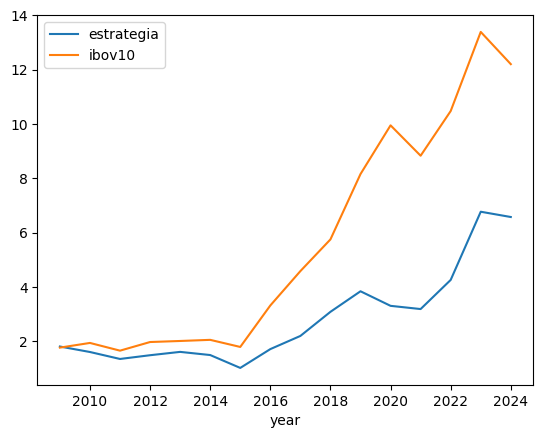

In [19]:
df_global = df_ret_year / 10
df_final = pd.DataFrame(strategy_return, columns=['estrategia'],
                        index=df_global.index[1:]).cumprod()

df_final['ibov10'] = (df_global.sum(axis=1) + 1).cumprod()
df_final.plot()